In [1]:
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import matplotlib.dates as mdates
import pandas as pd
import importlib
from matplotlib.dates import WeekdayLocator
# import constants for the days of the week
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.dates import HourLocator, DayLocator, YearLocator
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import sys
if "../src" not in sys.path:
    sys.path.append("../src")

from subzero import SubZero
# from ipywidgets import interact, IntSlider, FloatSlider

SMALL_SIZE = 25
MEDIUM_SIZE = 27
BIGGER_SIZE = 44

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

In [2]:
path = "../examples/gews_LK_2"

subzero = SubZero(path, output=False)

subzero.calculate()
# jetzt stehen Temperaturen in subzero.T und interne Wärmeflüsse in subzero.Q_int
# subzero.T[n]: Temperaturen aller Boxen zum Zeitschritt n
# subzero.T[:, n]: Temperaturzeitreihe von Box n
# subzero.Q_int[:, 0, 1], Wärmeflusszeitreihe, zwischen Box 0 (Speicher) und Box 1 (Speicherumgebung)

# subzero.H: Wärme in Boxen (Matrix, wie Temperatur) 
# subzero.Q_ext: Speicherleistung (Zeitreihe, array)
# subzero.v: Geschwindigkeit im Wärmetauscher (Zeitreihe, array)
# subzero.T_in, T_out: Temperaturen an Wärmetauscher (Zeitreihen, arrays)
# subzero.heat_exchanger_flag (Zeitreihe, array)

# subzero.latent_heat_capacity (Zeitreihe, array) (Multipliziert mit dT/dt * V: Rate [W])

read file  input.txt  -  1889  lines


In [3]:
datum = False
time_array = subzero.time_array_shifted_to_loadcurve

if datum:
    date_start = dt.datetime(1900, # year 
                             1, #month
                             1, # day
                             0, # hour
                             0, # min
                             0  # sec
                            )

    x = [date_start + dt.timedelta(seconds=int(time)) for time in time_array] # x-achse
    #loc_major = WeekdayLocator(byweekday=(MO)) # für major Grid, ausgewhälter Wochentag
    #loc_minor = AutoMinorLocator(7) # für minot Grid, einzelne Tage
    date_format = mdates.DateFormatter('%d.%m.')
    labelrotation=90 # grad, für x-label (Datum)
else:
    x = subzero.time_array_shifted_to_loadcurve / 86400 / 365

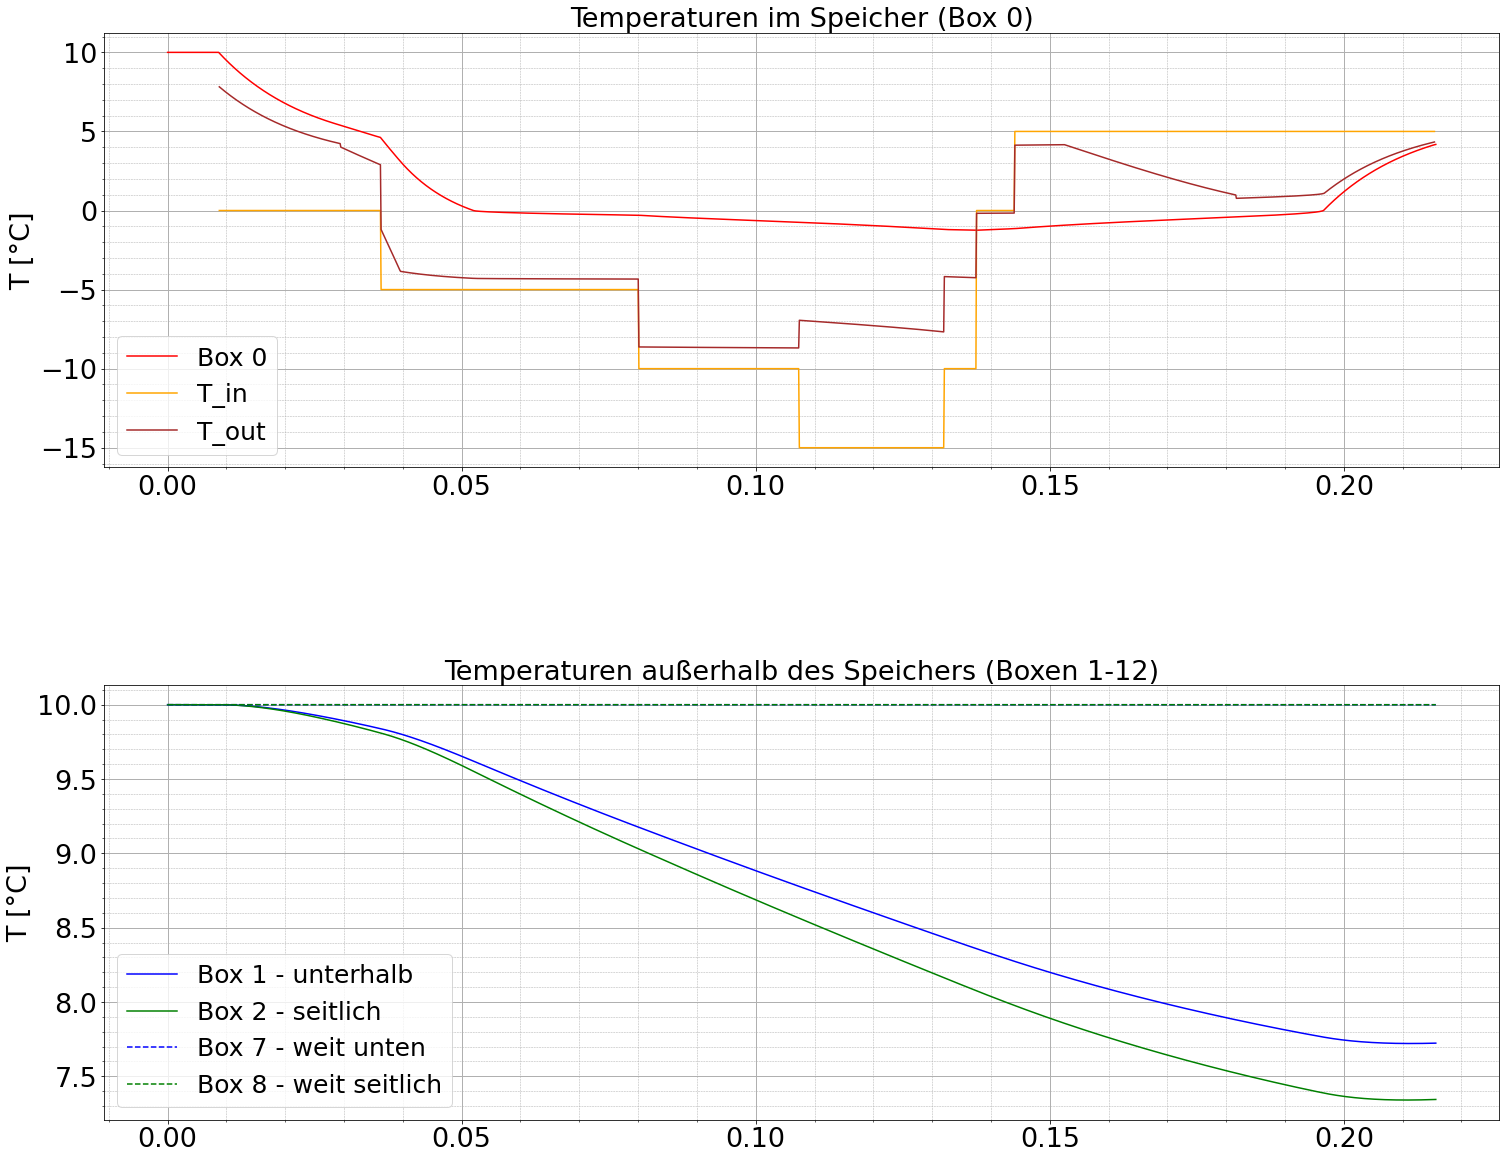

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(25, 20))
plt.subplots_adjust(wspace=.3, hspace=.5)


ax = axes[0]
ax.set_title("Temperaturen im Speicher (Box 0)")
ax.plot(x , subzero.T[:, 0], label='Box 0', color='red')#, marker='x')
ax.plot(x[1:] , subzero.T_in[1:], label='T_in', color='orange')
ax.plot(x[1:] , subzero.T_out[1:], label='T_out', color='brown')

try:
    if path not in sys.path:
        sys.path.append(path)
    storage_control = importlib.import_module("storage_control")

    frame = pd.read_excel(path + "/" + storage_control.input_file)
    ax.plot(x[1::12], frame.T_Storage, label='T_Storage', color='black', linestyle='--')

except:
    pass

ax.set_ylabel("T [°C]")

if datum:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
    ax.tick_params(axis='x', labelrotation=labelrotation)
    ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)
#ax.set_xticklabels([])
ax.legend()#loc='lower right')

#####################

ax = axes[1]
ax.set_title("Temperaturen außerhalb des Speichers (Boxen 1-12)")
ax.plot(x , subzero.T[:, 1], label='Box 1 - unterhalb', color='blue')
ax.plot(x , subzero.T[:, 2], label='Box 2 - seitlich', color='green')
ax.plot(x, subzero.T[:, 7], label='Box 7 - weit unten', color='blue', linestyle='--')
ax.plot(x , subzero.T[:, 8], label='Box 8 - weit seitlich', color='green', linestyle='--')

try:
    if path not in sys.path:
        sys.path.append(path)
    storage_control = importlib.import_module("storage_control")

    frame = pd.read_excel(path + "/" + storage_control.input_file)

    ax.plot(x[1::12], frame.T_UD, label='T_UD', color='black', linestyle='--')
except:
    pass
        
ax.set_ylabel("T [°C]")
if datum:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
    ax.tick_params(axis='x', labelrotation=labelrotation)
    ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)

ax.legend()#loc='lower right')

plt.savefig("ergebnisse_1.png")

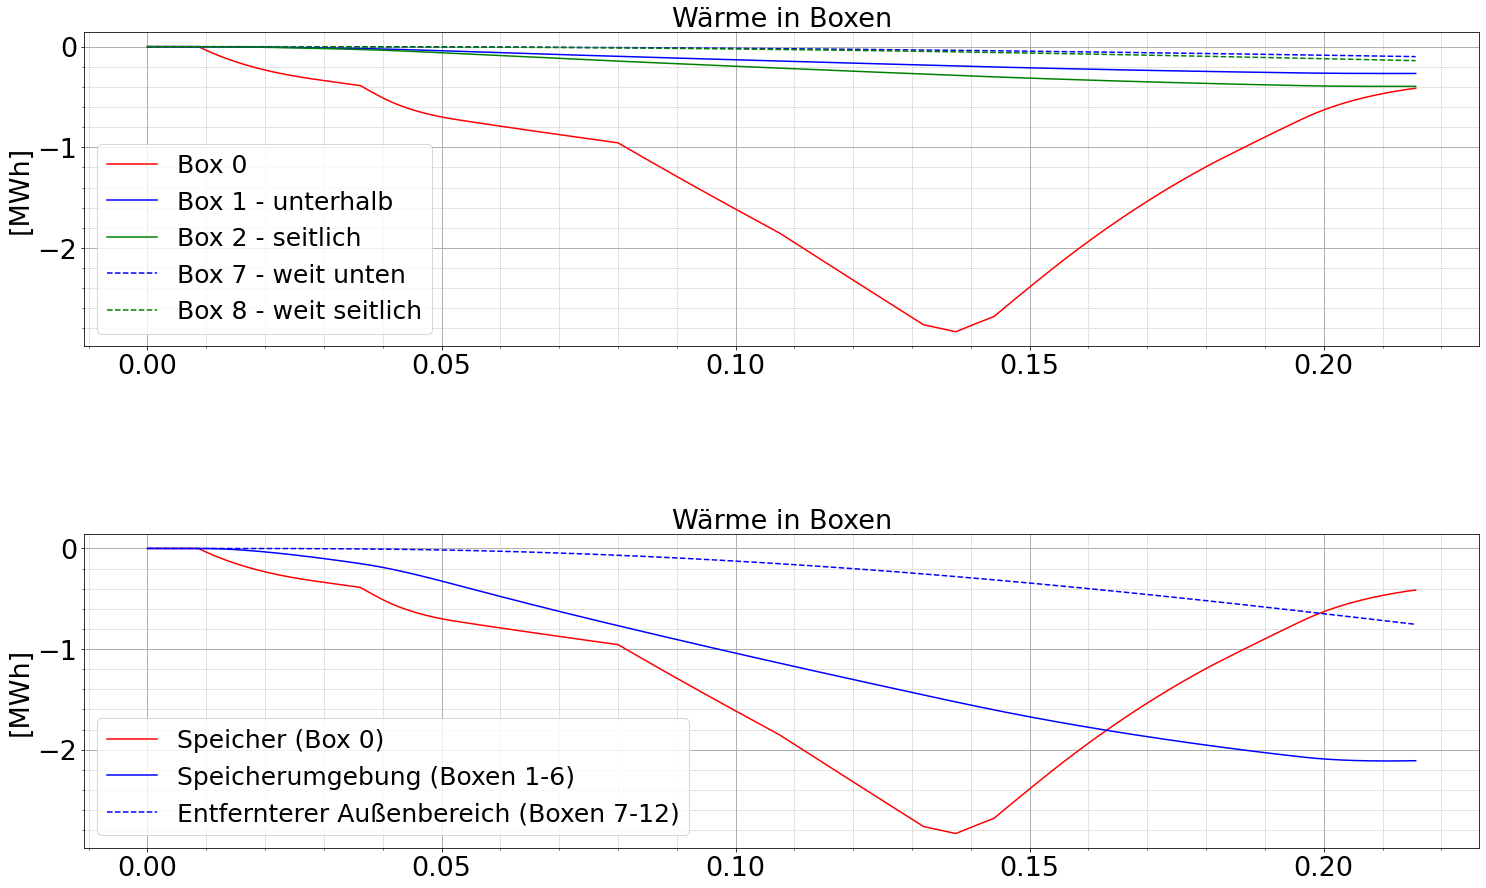

In [5]:

fig, axes = plt.subplots(2, 1, figsize=(25, 15))
plt.subplots_adjust(wspace=.3, hspace=.6)


#########################
storage_factor = 1e6*3600
ax = axes[0]
ax.set_title("Wärme in Boxen")
ax.plot(x, subzero.H[:, 0]/storage_factor, label='Box 0', color='red')
ax.plot(x, subzero.H[:, 1]/storage_factor, label='Box 1 - unterhalb', color='blue')
ax.plot(x, subzero.H[:, 2]/storage_factor, label='Box 2 - seitlich', color='green')
ax.plot(x, subzero.H[:, 7]/storage_factor, label='Box 7 - weit unten', color='blue', linestyle='--')
ax.plot(x, subzero.H[:, 8]/storage_factor, label='Box 8 - weit seitlich', color='green', linestyle='--')


ax.set_ylabel("[MWh]")
if datum:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
    ax.tick_params(axis='x', labelrotation=labelrotation)
    ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)

ax.legend()#loc='lower right')

#########################
ax = axes[1]
ax.set_title("Wärme in Boxen")
ax.plot(x, subzero.H[:, 0]/storage_factor, label='Speicher (Box 0)', color='red')
ax.plot(x, (subzero.H[:, 1]+subzero.H[:, 2]+subzero.H[:, 3]+
            subzero.H[:, 4]+subzero.H[:, 5]+subzero.H[:, 6])/storage_factor, 
        label='Speicherumgebung (Boxen 1-6)', color='blue')
ax.plot(x, (subzero.H[:, 7]+subzero.H[:, 8]+subzero.H[:, 9]+
            subzero.H[:, 10]+subzero.H[:, 11]+subzero.H[:, 12])/storage_factor, 
        label='Entfernterer Außenbereich (Boxen 7-12)', color='blue', linestyle='--')



ax.set_ylabel("[MWh]")
if datum:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
    ax.tick_params(axis='x', labelrotation=labelrotation)
    ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)

ax.legend()#loc='lower right')

plt.savefig("ergebnisse_2.png")

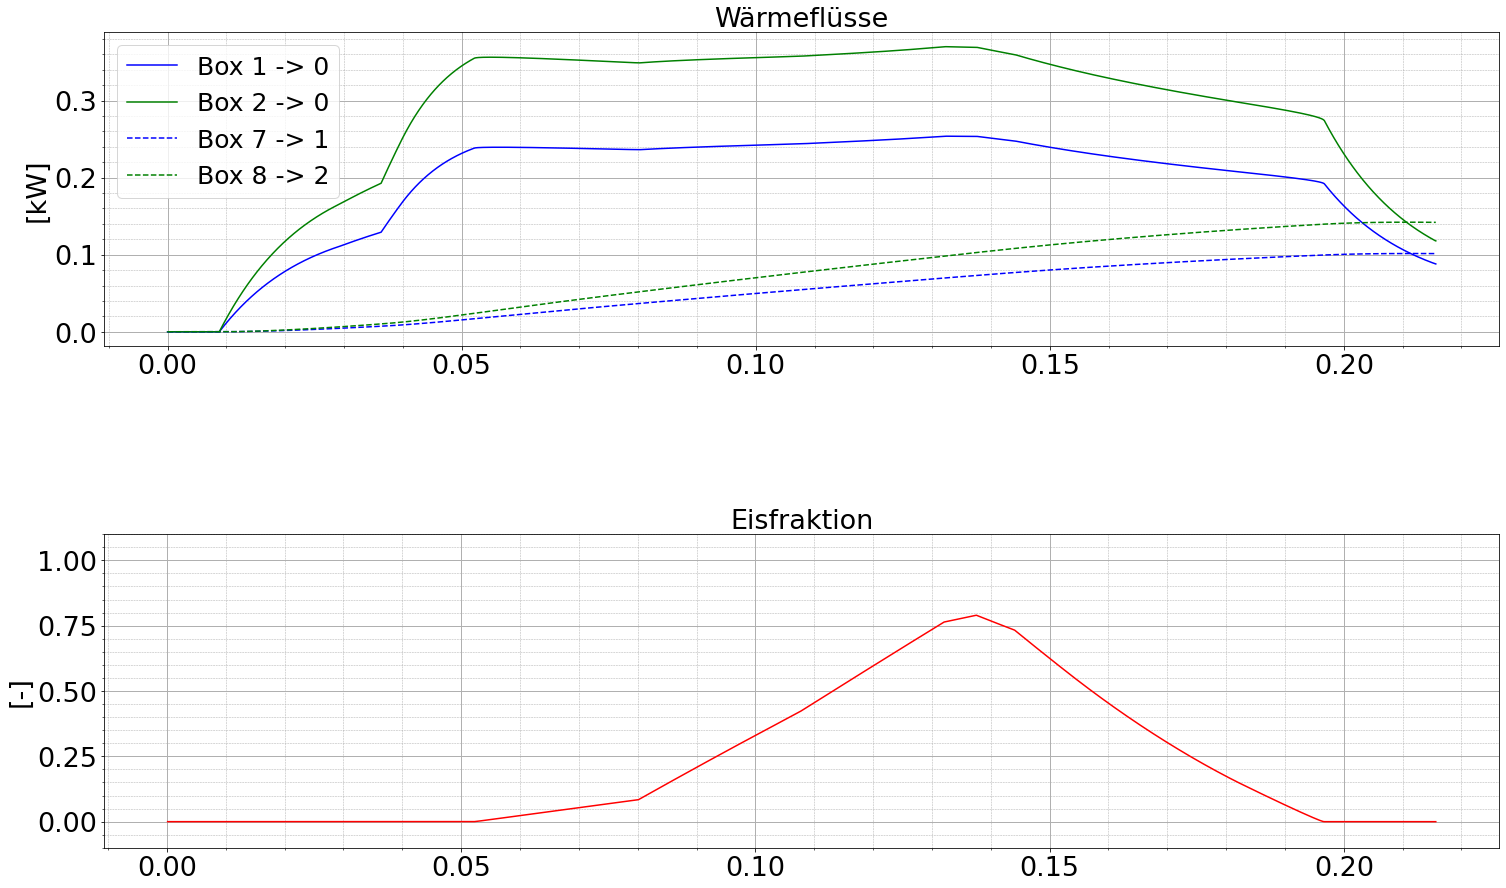

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(25, 15))
plt.subplots_adjust(wspace=.3, hspace=.6)


ax = axes[0]
ax.set_title("Wärmeflüsse")
ax.plot(x, subzero.Q_int[:,0, 1]/1000, color='blue', label='Box 1 -> 0')
ax.plot(x, subzero.Q_int[:,0, 2]/1000, color='green', label='Box 2 -> 0')

ax.plot(x, subzero.Q_int[:,1, 7]/1000, color='blue', linestyle='--', label='Box 7 -> 1')
ax.plot(x, subzero.Q_int[:,2, 8]/1000, color='green', linestyle='--', label='Box 8 -> 2')

ax.set_ylabel("[kW]")
#ax.set_ylim([-0.1, 1.1])
if datum:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
    ax.tick_params(axis='x', labelrotation=labelrotation)
    ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)

ax.legend()#loc='lower right')

#####################

ax = axes[1]
ax.set_title("Eisfraktion")
ax.plot(x[1:], 1-subzero.theta[1:], color='red')


ax.set_ylabel("[-]")
ax.set_ylim([-0.1, 1.1])
if datum:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
    ax.tick_params(axis='x', labelrotation=labelrotation)
    ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)

#####################

plt.savefig("ergebnisse_3.png")

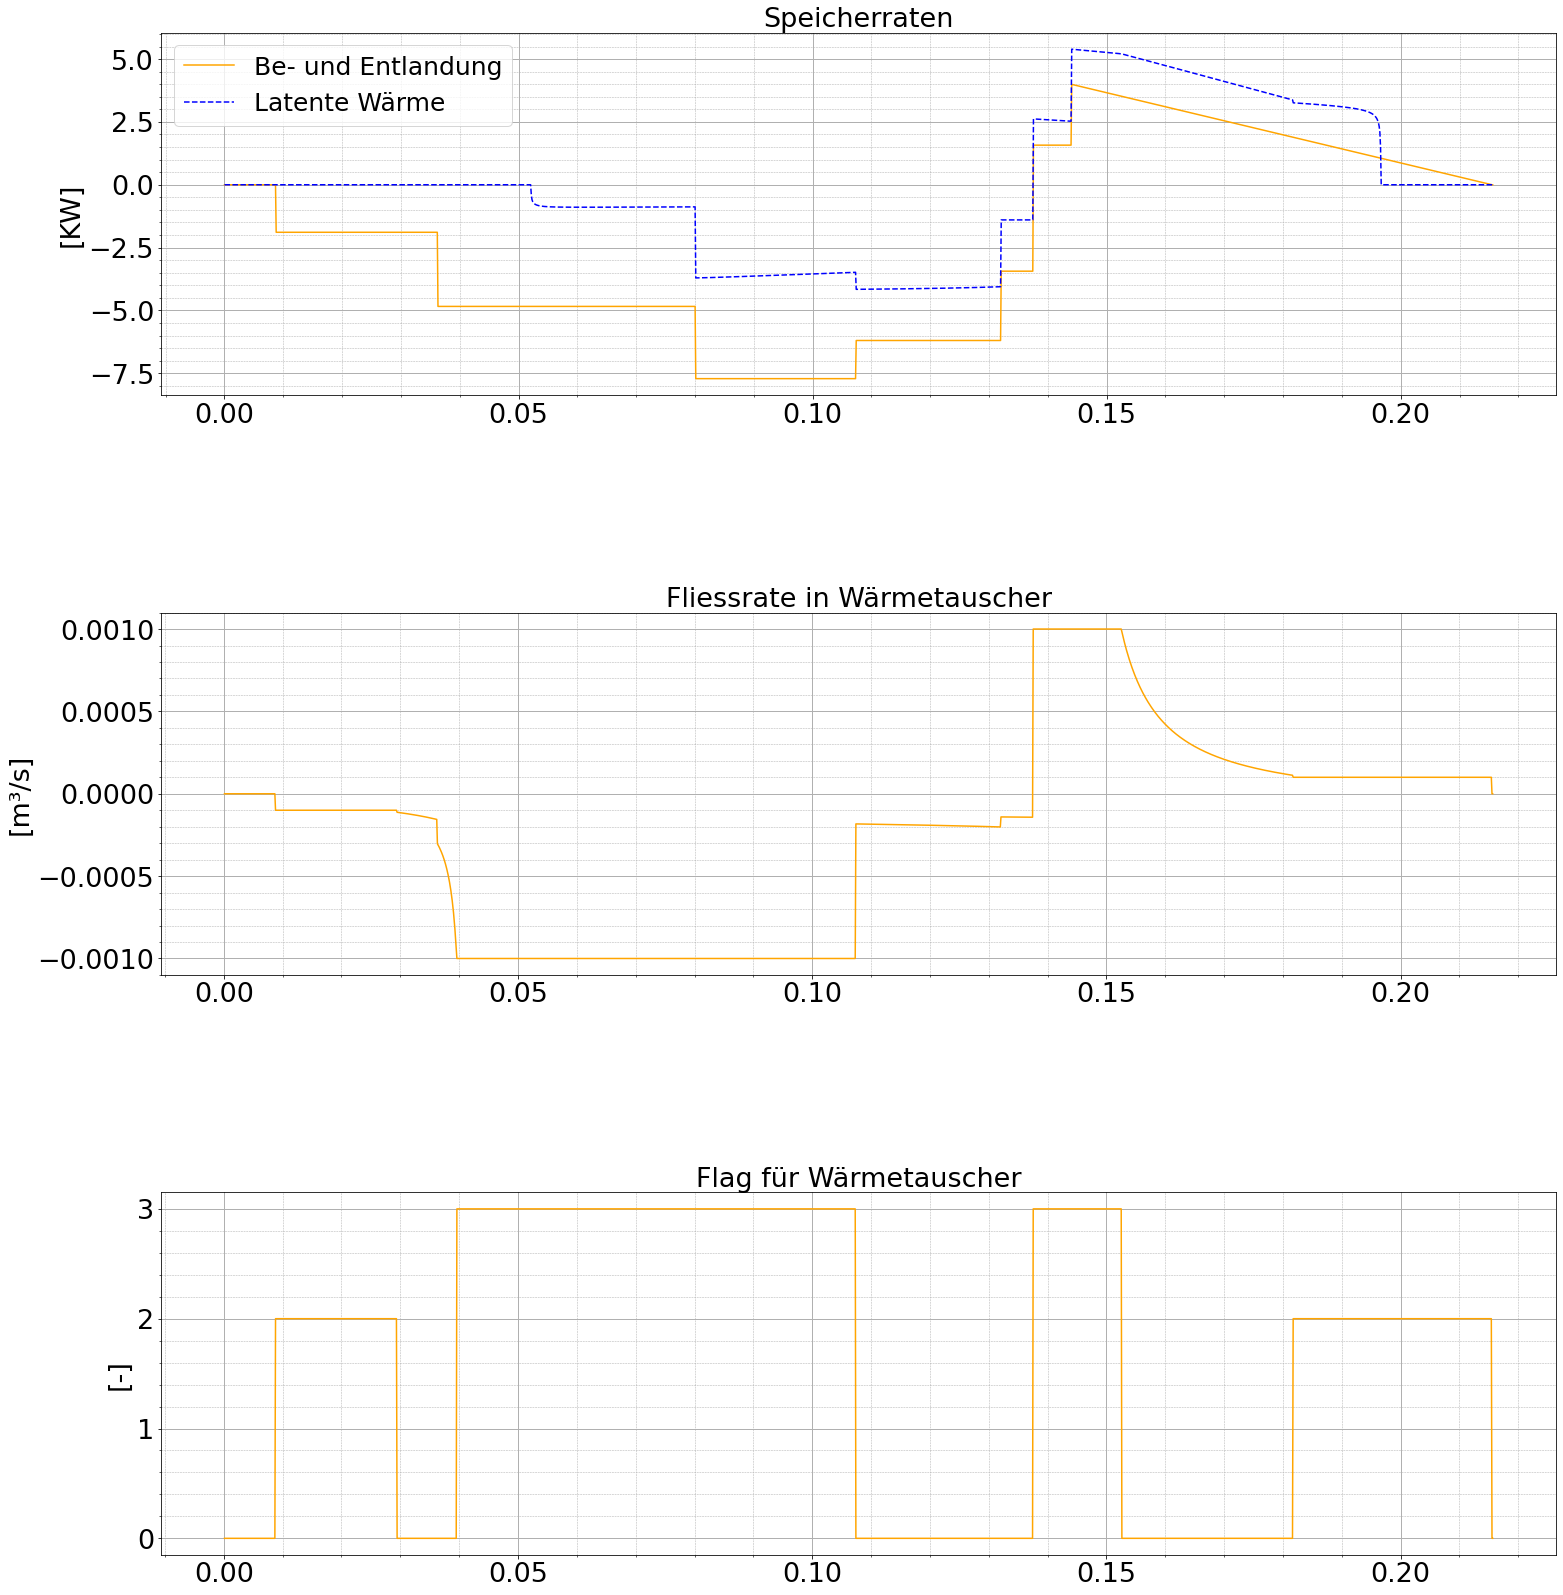

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(25, 28))
plt.subplots_adjust(wspace=.3, hspace=.6)

#########################
storage_factor = 1e3
V_box0 = 4*4*6 # m3
ax = axes[0]
ax.set_title("Speicherraten")
ax.plot(x, subzero.Q_ext/storage_factor, 
        label='Be- und Entlandung', color='orange')
ax.plot(x, 
        -subzero.latent_heat_capacity*V_box0*
        (subzero.T[:, 0]-np.roll(subzero.T[:, 0],1))/3600/storage_factor, 
        label='Latente Wärme', color='blue', linestyle='--')


ax.set_ylabel("[KW]")
if datum:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
    ax.tick_params(axis='x', labelrotation=labelrotation)
    ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)
ax.legend()#loc='lower right')

#########################

ax = axes[1]
ax.set_title("Fliessrate in Wärmetauscher")
ax.plot(x[1:], subzero.Q_flow[1:], label='Q_flow', color='orange') #*3600

ax.set_ylabel("[m³/s]")
if datum:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
    ax.tick_params(axis='x', labelrotation=labelrotation)
    ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)
#ax.legend()#loc='lower right')

#########################

ax = axes[2]
ax.set_title("Flag für Wärmetauscher")
ax.plot(x[1:], subzero.heat_exchanger_flag[1:], label='flag', color='orange')


ax.set_ylabel("[-]")
if datum:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
    ax.tick_params(axis='x', labelrotation=labelrotation)
    ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)
#ax.legend()#loc='lower right')

plt.savefig("ergebnisse_4.png")